<a href="https://colab.research.google.com/github/IvanovMaxim2000/AI_Course_work/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Машинное обучение

## Факультет математики НИУ ВШЭ

### 2020-2021 учебный год

[Страница курса](http://wiki.cs.hse.ru/Машинное_обучение_на_матфаке_2021)

Лектор: Илья Щуров

Семинаристы: Соня Дымченко, Руслан Хайдуров

# Семинар 2

Сегодня мы узнаем

* Как работает метод ближайших соседей, какие у него есть параметры и на что они влияют.
* Что такое кросс-валидация по отложенной выборке

# Метод k ближайших соседей

Метод k ближайших соседей (k nearest neighbours, k-NN) является одним из простейших алгоритмов машинного обучения. Несмотря на свою простоту, k-NN может превзойти более мощные алгоритмы и используется во множестве приложений, таких как экономическое прогнозирование, сжатие данных и генетика. Например, k-NN использовалась в [исследовании](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/1471-2105-7-S1-S11) по функциональной геномике в 2006 году, где гены определялись на основе их профилей экспрессии.

## Как работает k-NN?

Начнем с введения некоторых определений и обозначений.

* Пусть $x \in X$ — вектор признаков (или атрибутов) объекта. Обычно $X=\mathbb R^d$.
* Под $y$ мы будем подразумевать значение, которое мы хотим научиться предсказывать. Оно может быть числом (тогда говорят о *задаче регрессии*) или элементом конечного множества (*классом* или *меткой*, тогда говорят о *задаче классификации*). Например, предсказать выручку магазина по его месторасположению — это задача регрессии, а определить, болен человек некоторой конкретной болезнью или нет — задача классификации.

k-NN входит в число **supervised** алгоритмов или алгоритмов «обучения с учителем».
Это означает, что нам предоставляется набор данных $(x_1, y_1), \ldots, (x_n, y_n)$, в котором приведены признаки и верные ответы для $n$ каких-то объектов. Целью является на основе предоставляемой выборки найти связь между $x$ и $y$, то есть восстановить функцию $h: X \rightarrow Y$. Имея такую функцию, мы можем предсказать $y$ по имеющемуся наблюдению $x$.

Для нового объекта с вектором признаков $x_{new}$ алгоритм k-NN находит $k$ ближайших к $x_{new}$ точек среди $x_1, \ldots, x_n$. Пусть они имеют индексы $i_1, \ldots, i_k$. Для задачи регрессии в качестве $h(x)$ используется среднее соответствующих значений $y$, то есть

$$h(x)=\frac{1}{k}\sum_{i=1}^k y_{i_k}.$$

Для задачи классификации в качестве $h(x)$ используется то значение $y$, которое встречается среди $y_{i_1}, \ldots, y_{i_k}$ чаще всего (если таких значений несколько, выбирается какое-то одно из них — например, самое маленькое для какого-то порядка на классах).

## Реализация k-NN вручную

Чтобы лучше понять, как работает kNN, реализуем его «вручную». Наша реализация будет довольно неэффективной — для реальной работы мы будем использовать реализацию в библиотеке scikit-learn, которая использует хитрые структуры данных для быстрого поиска ближайшего соседа. Мы же будем банально сортировать все элементы по близости к новому и выбирать k самых близких. Это дико неэффективно (в серьёзных приложениях используются [k-d деревья](https://en.wikipedia.org/wiki/K-d_tree), но зато понятно, как работает.

In [ ]:
import numpy as np

### Вычисляем расстояние от новой точки до остальных точек в нашей выборке

Пусть $d=2$ и у нас есть три объекта в обучающей выборке. Зададим их как-нибудь.

In [ ]:
x_train = np.array([[2, 3],
                    [1, 5],
                    [0, 0]])
y_train = np.array([10, 20, 30])

Есть также новый объект, для которого мы хотим построить предсказание.

In [ ]:
x_new = np.array([1, 2])

Во-первых, нам нужно найти расстояния между `x_new` и остальными объектами в `x_train`. Проще всего это сделать так: найти их разности, затем найти нормы этих разностей. Получатся квадраты расстояний, но нам нужно их просто сравнить. Затем нужно использовать `np.linalg.norm`, чтобы найти их нормы. Вам придётся передать ему правильное значение параметра `axis`, чтобы были посчитаны нормы каждого из векторов, записанных по строкам.

In [ ]:
a = np.array([[1, 2, 3], [2, 3, 4], [1, 10, 23]])
b = np.array([-1, 1, 3])
x_train - x_new, np.linalg.norm(x_train - x_new, ord=2, axis=1)

(array([[ 1,  1],
        [ 0,  3],
        [-1, -2]]), array([1.41421356, 3.        , 2.23606798]))

In [ ]:
a = np.random.randint(-2, 2, (5, 7))
a

array([[-2, -2,  1, -1,  0,  1, -1],
       [ 0, -1,  0,  0,  0,  1,  1],
       [ 1, -1,  1, -1, -2, -2, -2],
       [ 0,  0, -1, -1,  0,  1, -2],
       [-1,  1, -2,  0,  0, -2, -1]])

In [ ]:
np.mean(a, axis=0)

array([-0.4, -0.6, -0.2, -0.6, -0.4, -0.2, -1. ])

$d(X - x^*)$

In [ ]:
np.linalg.norm()

### Выбор k ближайших соседей

Воспользуемся функцией `np.argsort`. Она выдаёт набор индексов, такой, что если брать элементы с этими индексами, то массив окажется отсортированным. Например.

In [ ]:
a = np.array([4, 100, 12, 3, 2, 10])
a[np.argsort(a)]

array([  2,   3,   4,  10,  12, 100])

Самый маленький элемент имеент индекс 4, следующий по малости — 3, потом 0 и т.д.

Если использовать массив индексов в качестве аргумента квадратных скобок, будут выбраны элементы, соответствующие этим индексам.

In [ ]:
arr = np.array([0, 10, 20, 30, 40])
arr[np.array([1, 0, 1, 2])]

array([10,  0, 10, 20])

Получаем для нашей задачи:

In [ ]:
def kNN_regression(x_train, y_train, x_new, k=1):
    """
    x_train is np.array with shape (n, d) (matrix with n rows, d columns)
    y_train is np.array with shape (n, ) (1-dimensional array with n elements)
    x_new is np.array with shape (d,) (1-dimensional array with d elements)
    """
    # YOUR CODE HERE 
    # 1) считаем расстояние от х_new до x_1, ..., x_n
    distances = np.linalg.norm(x_train - x_new, ord=2, axis=1)
    # 2) отсортировываем расстояния и берем ответы y_i_k первых k ближайших соседей
    indexes = np.argsort(distances)[:k]
    # 3) считаем среднее
    answer = np.mean(y_train[indexes])
    return answer

In [ ]:
kNN_regression(x_train = np.array([[12, 3],
                                   [4, 5],
                                   [1, 5]]),
               y_train = np.array([10, 20, 30]),
               x_new = np.array([11, 4]),
               k = 2)

15.0

## Синтезированные данные
Посмотрим, как работает k-NN на примере синтезированных данных. Пусть реальная зависимость $y$ и $x$ задаётся правилом $y=x^2+\varepsilon$, где $\varepsilon$ — некоторый шум с нулевым матожиданием.

Точнее, мы будем рассматривать следующую модель:

\begin{gather}
X \sim Uniform(-1, 1);\\
\varepsilon \sim \mathcal N(0, \varepsilon_0^2)\\
Y = X^2 + \varepsilon,
\end{gather}

где $Uniform(-1, 1)$ — равномерное распределение на отрезке $[-1, 1]$, переменные $X$ и $\varepsilon$ независимы.

In [ ]:
n = 10
np.random.uniform(low=-1, high=1, size=(n, 1))

array([[ 0.44040703],
       [ 0.29990358],
       [ 0.55544797],
       [-0.48043435],
       [-0.96187277],
       [-0.54119842],
       [-0.88436402],
       [ 0.31586362],
       [-0.88372021],
       [ 0.12998355]])

In [ ]:
def f(x):
    return x ** 2

# Y | X = X^2 + \eps

def make_data(n, eps0):
    """
    Return x, y
    x.shape == (n, 1)
    y.shape == (n,)
    """
    x = np.random.uniform(low=-1, high=1, size=(n, 1))
    eps = np.random.normal(0, eps0, (n, 1)) #  np.random.randn(n, 1) * eps0 
    y = x ** 2 + eps
    return x, y

Как обсуждалось на лекции, наилучшим предсказанием $y$ для данного $x$ с точки зрения минимизации ожидаемой ошибки для квадратичной функции потерь является условное матожидание $E[Y\mid X=x]$. Для нашей модели

$$E[Y\mid X=x]=x^2.$$

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

### Эффект от изменения $k$ 

Посмотрим, как работает k-NN для наших данных.

In [ ]:
X, Y = make_data(30, 0.1)

In [ ]:
a=[12,3,4]
d={'sep':'_', 'end':'!!!', '1':12}

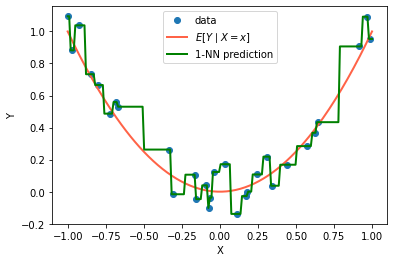

In [ ]:
def plot_kNN(X, Y, k, **kwargs):
    # print(kwargs) - kwargs = {name_parameter1=parameter1, name_parameter2=parameter12}
    plt.plot(X[:, 0], Y, 'o', label="data", **kwargs)
    x_grid = np.linspace(-1, 1, 200)
    plt.plot(x_grid, f(x_grid), color='tomato', lw=2, label="$E[Y\mid X=x]$")
    plt.plot(x_grid, [kNN_regression(X, Y, x_new, k) for x_new in x_grid], 
             'g-', label="{}-NN prediction".format(k), lw=2)
    plt.legend()
    plt.xlabel("X")
    plt.ylabel("Y")
plot_kNN(X, Y, 1)

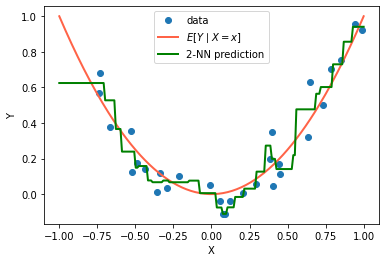

In [ ]:
plot_kNN(X, Y, 2)

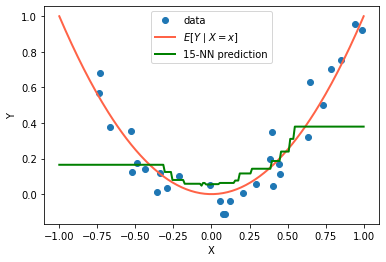

In [ ]:
plot_kNN(X, Y, 15)

Что будет, если увеличить количество данных?

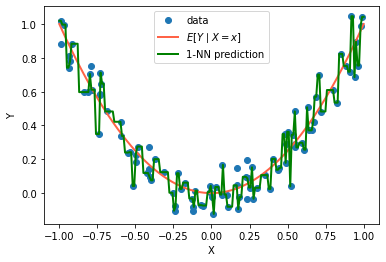

In [ ]:
X, Y = make_data(100, 0.1)
plot_kNN(X, Y, 1)

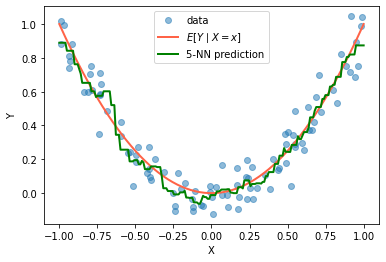

In [ ]:
plot_kNN(X, Y, 5, alpha=0.5)

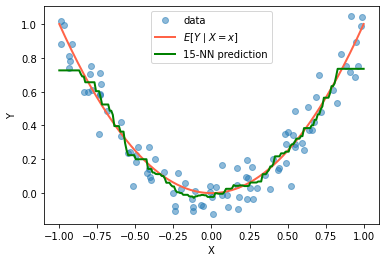

In [ ]:
plot_kNN(X, Y, 15, alpha=0.5)

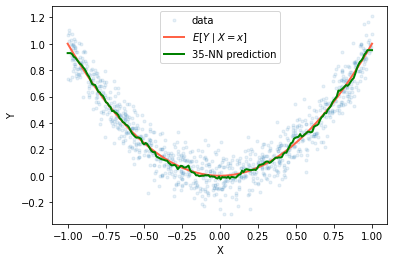

In [ ]:
X, Y = make_data(1000, 0.1)
plot_kNN(X, Y, 35, markersize=3, alpha=0.1)

**Теорема**. Если $f(x)=E[Y\mid X=x]$ является непрерывной функцией от $x$, при некоторых дополнительных условиях, k-NN-регрессия стремится к $f(x)$ при $k, N \to \infty$, т.ч. $k/N\to 0$.

**Основная идея:** если данных очень много, то можно выбрать такое большое $k$, которое было бы при этом мало по сравнению с $N$. При этом $k$ ближайших соседей для точки $x_{new}$ будут лежать очень близко к ней, и, за счёт того, что $k$ большое, k-NN оценка будет достаточно близкой к истинному матожиданию $f(x_{new})$.

### Отступление: передача именованных параметров с помощью `**`

In [ ]:
def foo(x, y):
    print(f"x = {x}, y = {y}")

In [ ]:
foo(3, 4)

x = 3, y = 4


In [ ]:
foo(x=2, y=3)

x = 2, y = 3


In [ ]:
params = {'x': 2, 'y': 3}

In [ ]:
foo(x=params['x'], y=params['y'])

x = 2, y = 3


Вот так можно сделать это коротко:

In [ ]:
foo(**params)

x = 2, y = 3


### Оценка EPE

$$EPE(f) \approx \frac{1}{n} \sum_{i=1}^n L(y^{new}_i, f(x^{new}_i))$$

In [ ]:
def EPE(f, L, make_data, data_args, f_args):
    X_new, Y_new = make_data(**data_args)
    return sum(L(y_new, f(x_new, **f_args)) for x_new, y_new in zip(X_new, Y_new)) / len(X_new)

Text(0, 0.5, 'EPE')

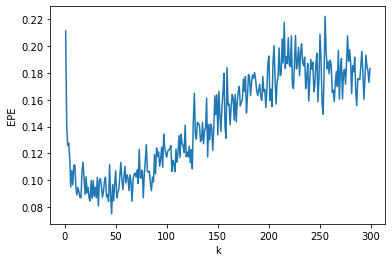

In [ ]:
def f(x, k):
    return kNN_regression(X, Y, x, k)

def L(y, y_hat): # loss function
    return (y - y_hat) ** 2

n_train = 300
eps0 = 0.3

X, Y = make_data(n=n_train, eps0=eps0)

k = range(1, n_train)

# построить зависимость приближения к EPE от k для k \in [1, n_train]
plt.plot(k, [EPE(f, L, make_data, data_args={'n':n_train, 'eps0':eps0}, 
                 f_args={'k':k_i}) for k_i in k])
plt.xlabel('k')
plt.ylabel('EPE')


### Кросс-валидация: hold-out выборка

In [ ]:
X, Y = make_data(n=n_train, eps0=eps0)

In [ ]:
X_train = X[-(n_train * 2 // 3):]
Y_train = Y[-(n_train * 2 // 3):]

X_test = X[:-(n_train * 2 // 3)]
Y_test = Y[:-(n_train * 2 // 3)]

In [ ]:
def kv_score(k):
    return sum(L(y_new, kNN_regression(X_train, Y_train, x_new, k=k)) 
               for x_new, y_new in zip(X_test, Y_test)) / len(X_test)

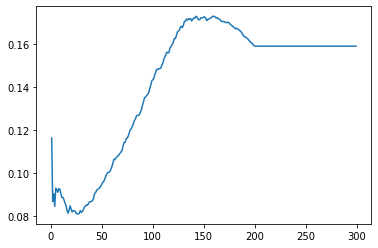

In [ ]:
k = range(1, 300)
plt.plot(k, [kv_score(k_) for k_ in k])

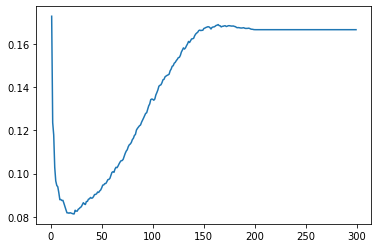

In [ ]:
k = range(1, 300)
plt.plot(k, [kv_score(k_) for k_ in k])

### kNN для задачи классификации
Напишите функцию `kNN_classifier(x_train, y_train, x_new, k=1)` по аналогии с `kNN_regression`. Вместо взятия среднего нужно выбрать значение $y$, которое встречается среди $k$ ближайших соседей чаще всего. (Подсказка: оно называется *модой*.)

In [ ]:
a = np.arange(0,20).reshape(10, 2)
b = np.arange(20,60).reshape(20, 2) 

In [ ]:
# D [10 x 20 x 2] - наши разницы между координатами точек из двух сабсетов
D = a[:, None, :] - b[None, :, :]
# c [10 x 20] - наши расстояния между точками из двух сабсетов
c = np.linalg.norm(D, ord=2, axis=2)
c.shape

(10, 20)

In [ ]:
def kNN_classifier(x_train, y_train, x_new, k=1):
    # YOUR CODE HERE
    pass

In [ ]:
x_1 = np.random.normal((-1, 1), 0.5, (200, 2))
x_2 = np.random.normal((1, -1), 0.3, (300, 2))
y_1 = np.zeros((200))
y_2 = np.ones((300))

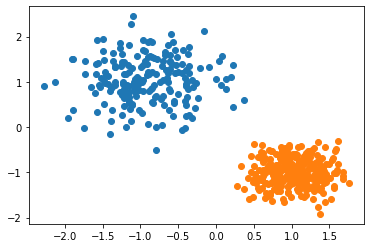

In [ ]:
plt.scatter(x_1[:,0], x_1[:, 1], label='0')
plt.scatter(x_2[:,0], x_2[:, 1], label='1')

In [ ]:
X = np.vstack([x_1, x_2])
y = np.hstack([y_1, y_2])

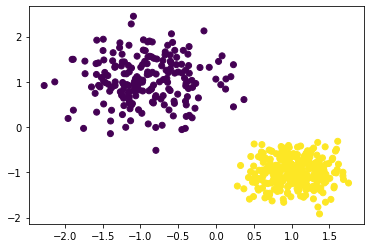

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y)

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_tr, X_t, y_tr, y_t = train_test_split(X, y, test_size=0.4)

In [ ]:
kNN_classifier(X_tr, y_tr, X_t, k=10)